In [689]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [690]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [691]:
def generate_random_concept_h():
    p = random.randint(0, 100)
    q = random.randint(0, 100)
    r = random.randint(0, 100)
    s = random.randint(0, 100)
    return [ min(p, q), max(p, q), min(r, s), max(r, s) ]

In [692]:
def generate_dataset(n):
    dataset=[]
    while(n>0):
        x = random.randint(0, 100)
        y = random.randint(0, 100)
        dataset.append([x,y])
        n-=1
    return dataset

In [693]:
def predicate(x, y, h_parameters):
    p = h_parameters[0]
    q = h_parameters[1]
    r = h_parameters[2]
    s = h_parameters[3]
    if p <= x and x <= q and r <= y and y <= s:
        return 1
    return 0

In [694]:
def labeling_function(dataset, h_parameters):
    labeled_dataset=[]
    for data_instance in dataset:
        x = data_instance[0]
        y = data_instance[1]
        fxy = predicate(x, y, h_parameters)
        labeled_dataset.append([x, y, fxy])
    return labeled_dataset

In [695]:
def generate_hypothesis(labeled_dataset):
    p_pred=100
    q_pred=0
    r_pred=100
    s_pred=0
    for dataset_instance in labeled_dataset:
        if dataset_instance[2]==1:
            p_pred = min(p_pred,dataset_instance[0])
            q_pred = max(q_pred,dataset_instance[0])
            r_pred = min(r_pred,dataset_instance[1])
            s_pred = max(s_pred,dataset_instance[1])
    return [p_pred, q_pred, r_pred, s_pred]

In [696]:
def calculate_emperical_error(hypothesis_parameter, labeled_dataset):
    error=0
    predicted_label_dataset = labeling_function(labeled_dataset, hypothesis_parameter)
    size = len(labeled_dataset)
    for i in range(size):
        if predicted_label_dataset[2] != labeled_dataset[2]:
            error+=1
    return error
    

In [697]:
random.seed(3)
random_concept_h_parameter = generate_random_concept_h()
print("Random Concept h:")
print("p = ", random_concept_h_parameter[0])
print("q = ", random_concept_h_parameter[1])
print("r = ", random_concept_h_parameter[2])
print("s = ", random_concept_h_parameter[3])

Random Concept h:
p =  30
q =  75
r =  16
s =  69


In [698]:
dataset100 = generate_dataset(100)
# print(dataset100)

In [699]:
labeled_dataset100 = labeling_function(dataset100, random_concept_h_parameter)
print(labeled_dataset100)
# count0=0
# count1=0
# for data_instance in labeled_dataset100:
#     if data_instance[2]==1:
#         count1+=1
#     else:
#         count0+=1
# print(count0)
# print(count1)

[[47, 77, 0], [60, 80, 0], [74, 8, 0], [77, 1, 0], [60, 33, 1], [70, 29, 1], [24, 91, 0], [60, 69, 1], [70, 60, 1], [50, 81, 0], [19, 29, 0], [81, 19, 0], [66, 49, 1], [94, 1, 0], [85, 99, 0], [8, 20, 0], [97, 75, 0], [5, 38, 0], [99, 3, 0], [34, 60, 1], [76, 92, 0], [49, 91, 0], [100, 54, 0], [50, 93, 0], [73, 56, 1], [17, 46, 0], [12, 4, 0], [17, 63, 0], [27, 33, 0], [86, 55, 0], [99, 80, 0], [38, 53, 1], [64, 49, 1], [73, 44, 1], [68, 74, 0], [52, 74, 0], [29, 43, 0], [87, 3, 0], [35, 77, 0], [85, 89, 0], [20, 89, 0], [41, 69, 1], [73, 72, 0], [13, 91, 0], [83, 27, 0], [81, 73, 0], [34, 36, 1], [15, 8, 0], [61, 81, 0], [61, 11, 0], [44, 8, 0], [52, 19, 1], [2, 37, 0], [54, 98, 0], [53, 15, 0], [5, 77, 0], [78, 97, 0], [5, 48, 0], [91, 75, 0], [42, 70, 0], [35, 64, 1], [30, 4, 0], [39, 0, 0], [9, 13, 0], [76, 68, 0], [4, 25, 0], [52, 37, 1], [78, 33, 0], [19, 88, 0], [5, 43, 0], [40, 46, 1], [17, 48, 0], [48, 58, 1], [66, 49, 1], [82, 76, 0], [87, 71, 0], [13, 79, 0], [64, 34, 1], [5

In [700]:
hypothesis_h1_parameter = generate_hypothesis(labeled_dataset100)
print("Hypothesis h1:")
print("predicted p= ", hypothesis_h1_parameter[0])
print("predicted q = ", hypothesis_h1_parameter[1])
print("predicted r = ", hypothesis_h1_parameter[2])
print("predicted s = ", hypothesis_h1_parameter[3])
h1_labeled_dataset100 = labeling_function(dataset100, hypothesis_h1_parameter)

Hypothesis h1:
predicted p=  30
predicted q =  73
predicted r =  19
predicted s =  69


In [701]:
emperical_error100= calculate_emperical_error(hypothesis_h1_parameter,h1_labeled_dataset100)
print(emperical_error100)

0


From true hypothesis :


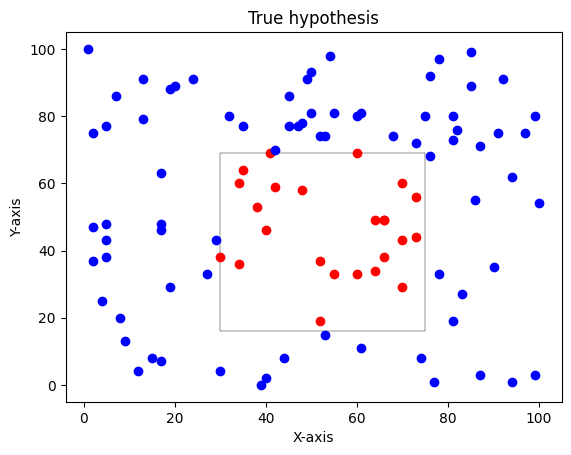

From hypothesis h1:


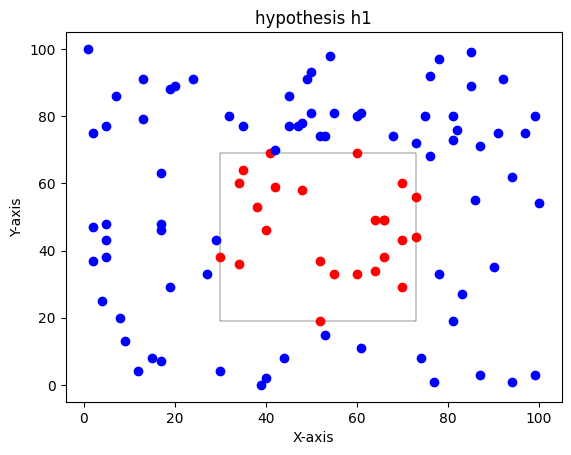

In [702]:
print("From true hypothesis :")
fig, ax = plt.subplots()
rectangle = patches.Rectangle((random_concept_h_parameter[0], random_concept_h_parameter[2]), random_concept_h_parameter[1]-random_concept_h_parameter[0], random_concept_h_parameter[3]-random_concept_h_parameter[2], linewidth=0.3, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)
for dataset_instance in labeled_dataset100:
    if dataset_instance[2] == 1:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='red')
    else:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='blue')
        
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('True hypothesis')
plt.show()

print("From hypothesis h1:")
fig, ax = plt.subplots()
rectangle = patches.Rectangle((hypothesis_h1_parameter[0], hypothesis_h1_parameter[2]), hypothesis_h1_parameter[1]-hypothesis_h1_parameter[0], hypothesis_h1_parameter[3]-hypothesis_h1_parameter[2], linewidth=0.3, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)
for dataset_instance in h1_labeled_dataset100:
    if dataset_instance[2] == 1:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='red')
    else:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='blue')
        
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('hypothesis h1')
plt.show()

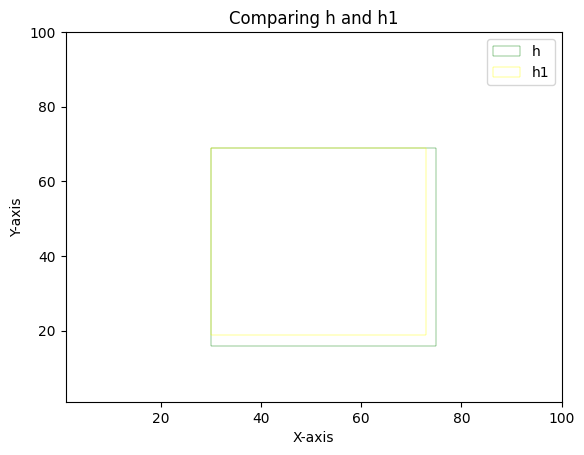

In [703]:
# Comparision between h and h1
fig, ax = plt.subplots()
# True hypothesis
rectangle_h = patches.Rectangle((random_concept_h_parameter[0], random_concept_h_parameter[2]), random_concept_h_parameter[1]-random_concept_h_parameter[0], random_concept_h_parameter[3]-random_concept_h_parameter[2], linewidth=0.3, edgecolor='green', facecolor='none', label='h')
ax.add_patch(rectangle_h)
rectangle_h1 = patches.Rectangle((hypothesis_h1_parameter[0], hypothesis_h1_parameter[2]), hypothesis_h1_parameter[1]-hypothesis_h1_parameter[0], hypothesis_h1_parameter[3]-hypothesis_h1_parameter[2], linewidth=0.3, edgecolor='yellow', facecolor='none', label='h1')
ax.add_patch(rectangle_h1)

ax.set_xlim(1, 100)
ax.set_ylim(1, 100)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Comparing h and h1')
plt.legend()
plt.show()

In [704]:
dataset200 = dataset100 + generate_dataset(100)
h1_labeled_dataset200 = labeling_function(dataset200, hypothesis_h1_parameter)
emperical_error200= calculate_emperical_error(hypothesis_h1_parameter, h1_labeled_dataset200)
print(emperical_error200)

0


In [705]:
labeled_dataset200 = labeling_function(dataset200, random_concept_h_parameter)
hypothesis_h2_parameter = generate_hypothesis(labeled_dataset200)
print("Hypothesis h2:")
print("predicted p= ", hypothesis_h2_parameter[0])
print("predicted q = ", hypothesis_h2_parameter[1])
print("predicted r = ", hypothesis_h2_parameter[2])
print("predicted s = ", hypothesis_h2_parameter[3])
h2_labeled_dataset200 = labeling_function(dataset200, hypothesis_h2_parameter)
emperical_error200 = calculate_emperical_error(hypothesis_h2_parameter, h2_labeled_dataset200)
print(emperical_error200)

Hypothesis h2:
predicted p=  30
predicted q =  73
predicted r =  16
predicted s =  69
0


From true hypothesis :


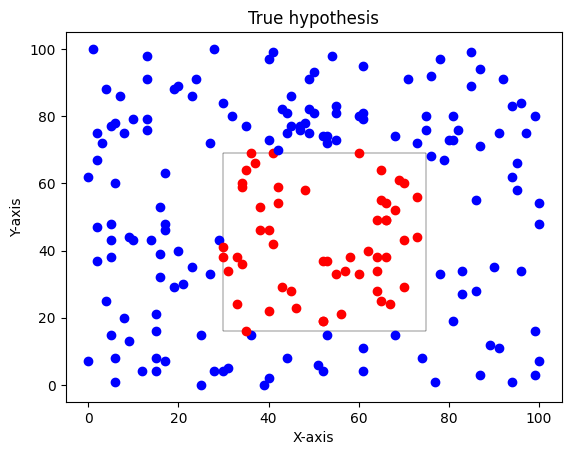

From hypothesis h1:


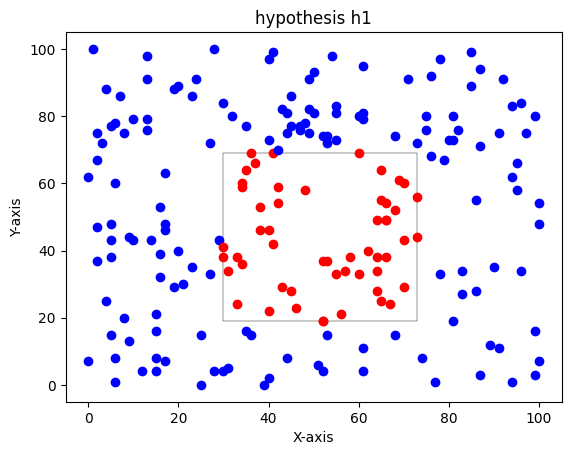

From hypothesis h2:


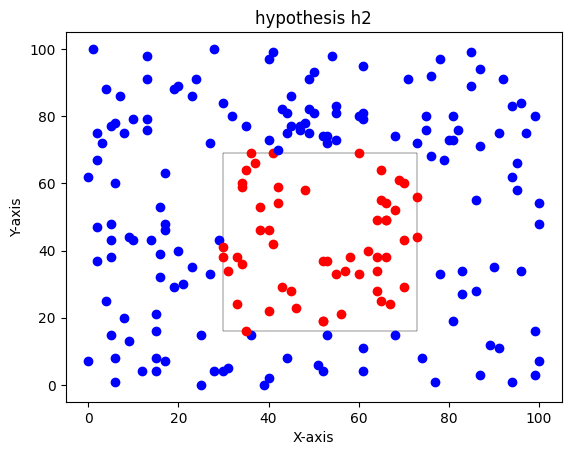

In [706]:
print("From true hypothesis :")
fig, ax = plt.subplots()
rectangle = patches.Rectangle((random_concept_h_parameter[0], random_concept_h_parameter[2]), random_concept_h_parameter[1]-random_concept_h_parameter[0], random_concept_h_parameter[3]-random_concept_h_parameter[2], linewidth=0.3, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)
for dataset_instance in labeled_dataset200:
    if dataset_instance[2] == 1:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='red')
    else:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='blue')
        
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('True hypothesis')
plt.show()

print("From hypothesis h1:")
fig, ax = plt.subplots()
rectangle = patches.Rectangle((hypothesis_h1_parameter[0], hypothesis_h1_parameter[2]), hypothesis_h1_parameter[1]-hypothesis_h1_parameter[0], hypothesis_h1_parameter[3]-hypothesis_h1_parameter[2], linewidth=0.3, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)
for dataset_instance in h1_labeled_dataset200:
    if dataset_instance[2] == 1:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='red')
    else:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='blue')
        
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('hypothesis h1')
plt.show()

print("From hypothesis h2:")
fig, ax = plt.subplots()
rectangle = patches.Rectangle((hypothesis_h2_parameter[0], hypothesis_h2_parameter[2]), hypothesis_h2_parameter[1]-hypothesis_h2_parameter[0], hypothesis_h2_parameter[3]-hypothesis_h2_parameter[2], linewidth=0.3, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)
for dataset_instance in h2_labeled_dataset200:
    if dataset_instance[2] == 1:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='red')
    else:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='blue')
        
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('hypothesis h2')
plt.show()

In [ ]:
# Comparision between h and h1
fig, ax = plt.subplots()
# True hypothesis
rectangle_h = patches.Rectangle((random_concept_h_parameter[0], random_concept_h_parameter[2]), random_concept_h_parameter[1]-random_concept_h_parameter[0], random_concept_h_parameter[3]-random_concept_h_parameter[2], linewidth=0.3, edgecolor='green', facecolor='none', label='h')
ax.add_patch(rectangle_h)
rectangle_h1 = patches.Rectangle((hypothesis_h1_parameter[0], hypothesis_h1_parameter[2]), hypothesis_h1_parameter[1]-hypothesis_h1_parameter[0], hypothesis_h1_parameter[3]-hypothesis_h1_parameter[2], linewidth=0.3, edgecolor='yellow', facecolor='none', label='h1')
ax.add_patch(rectangle_h1)
rectangle_h1 = patches.Rectangle((hypothesis_h1_parameter[0], hypothesis_h1_parameter[2]), hypothesis_h1_parameter[1]-hypothesis_h1_parameter[0], hypothesis_h1_parameter[3]-hypothesis_h1_parameter[2], linewidth=0.3, edgecolor='purple', facecolor='none', label='h2')
ax.add_patch(rectangle_h1)

ax.set_xlim(1, 100)
ax.set_ylim(1, 100)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Comparing h and h1')
plt.legend()
plt.show()